In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.shape

(1599, 12)

In [6]:
print(*df.columns,sep='\n')

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

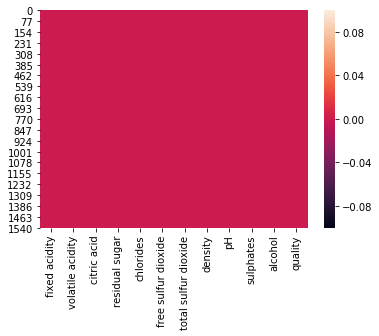

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
#Exploratory Data Analysis and Preprocessing

In [12]:
#we group wine quality into two categories namely 'good'or 'bad'
grade=[]
for i in df['quality']:
    if i>5:
        grade.append('good')
    else:
        grade.append('bad')
df['grade']=grade

In [13]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
763,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,5,bad
1308,9.7,0.690,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1,5,bad
1480,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,4,bad
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5,bad
1097,8.6,0.520,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5,bad


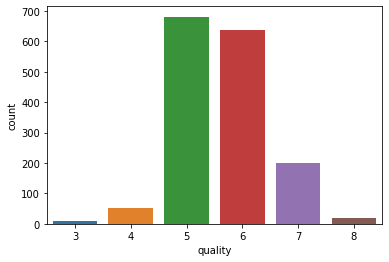

In [14]:
sns.countplot(df.quality)

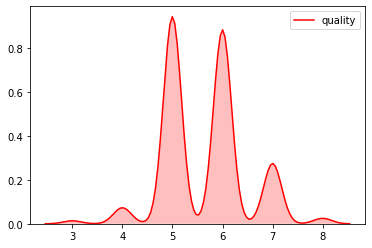

In [15]:
sns.kdeplot(df.quality,shade=True,color='red')

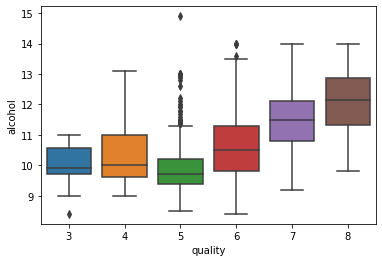

In [16]:
sns.boxplot(df.quality,df.alcohol)

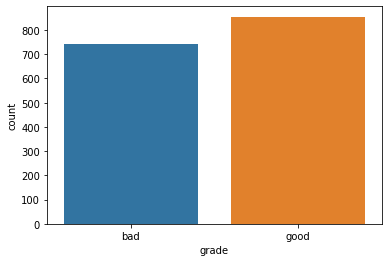

In [17]:
sns.countplot(df.grade)

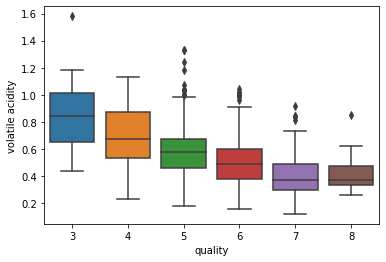

In [18]:
sns.boxplot('quality','volatile acidity',data=df)

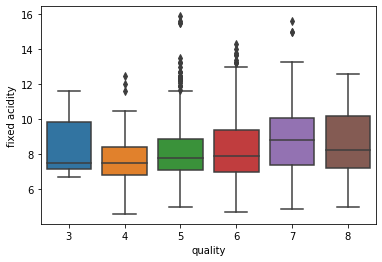

In [19]:
sns.boxplot('quality','fixed acidity',data=df)

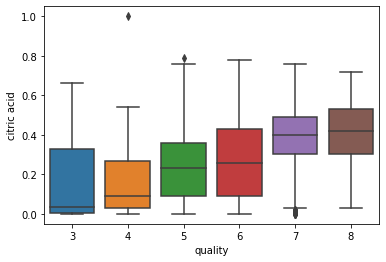

In [20]:
sns.boxplot('quality','citric acid',data=df)

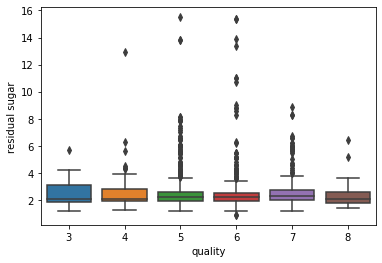

In [21]:
sns.boxplot('quality','residual sugar',data=df)

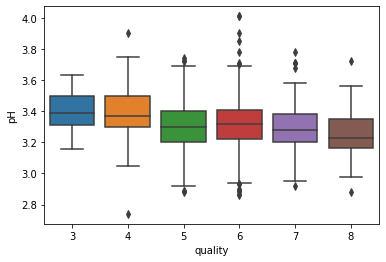

In [22]:
sns.boxplot('quality','pH',data=df)

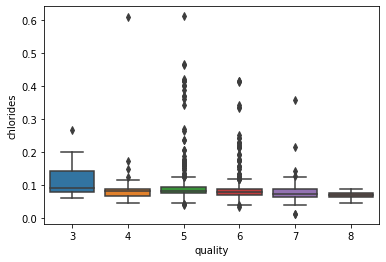

In [23]:
sns.boxplot('quality','chlorides',data=df)

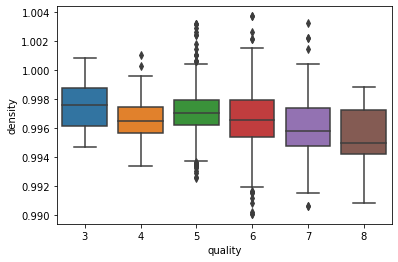

In [24]:
sns.boxplot('quality','density',data=df)

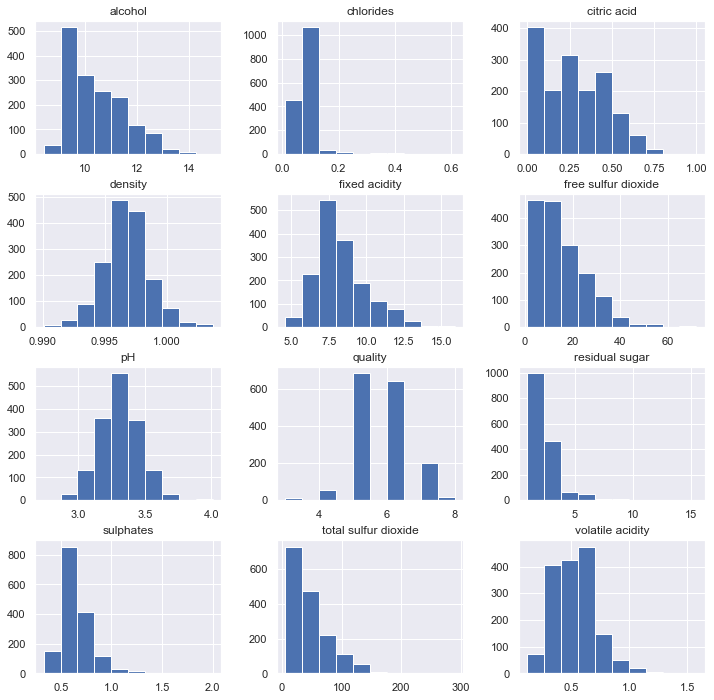

In [25]:
sns.set()
df.hist(figsize=(12,12))
plt.show()

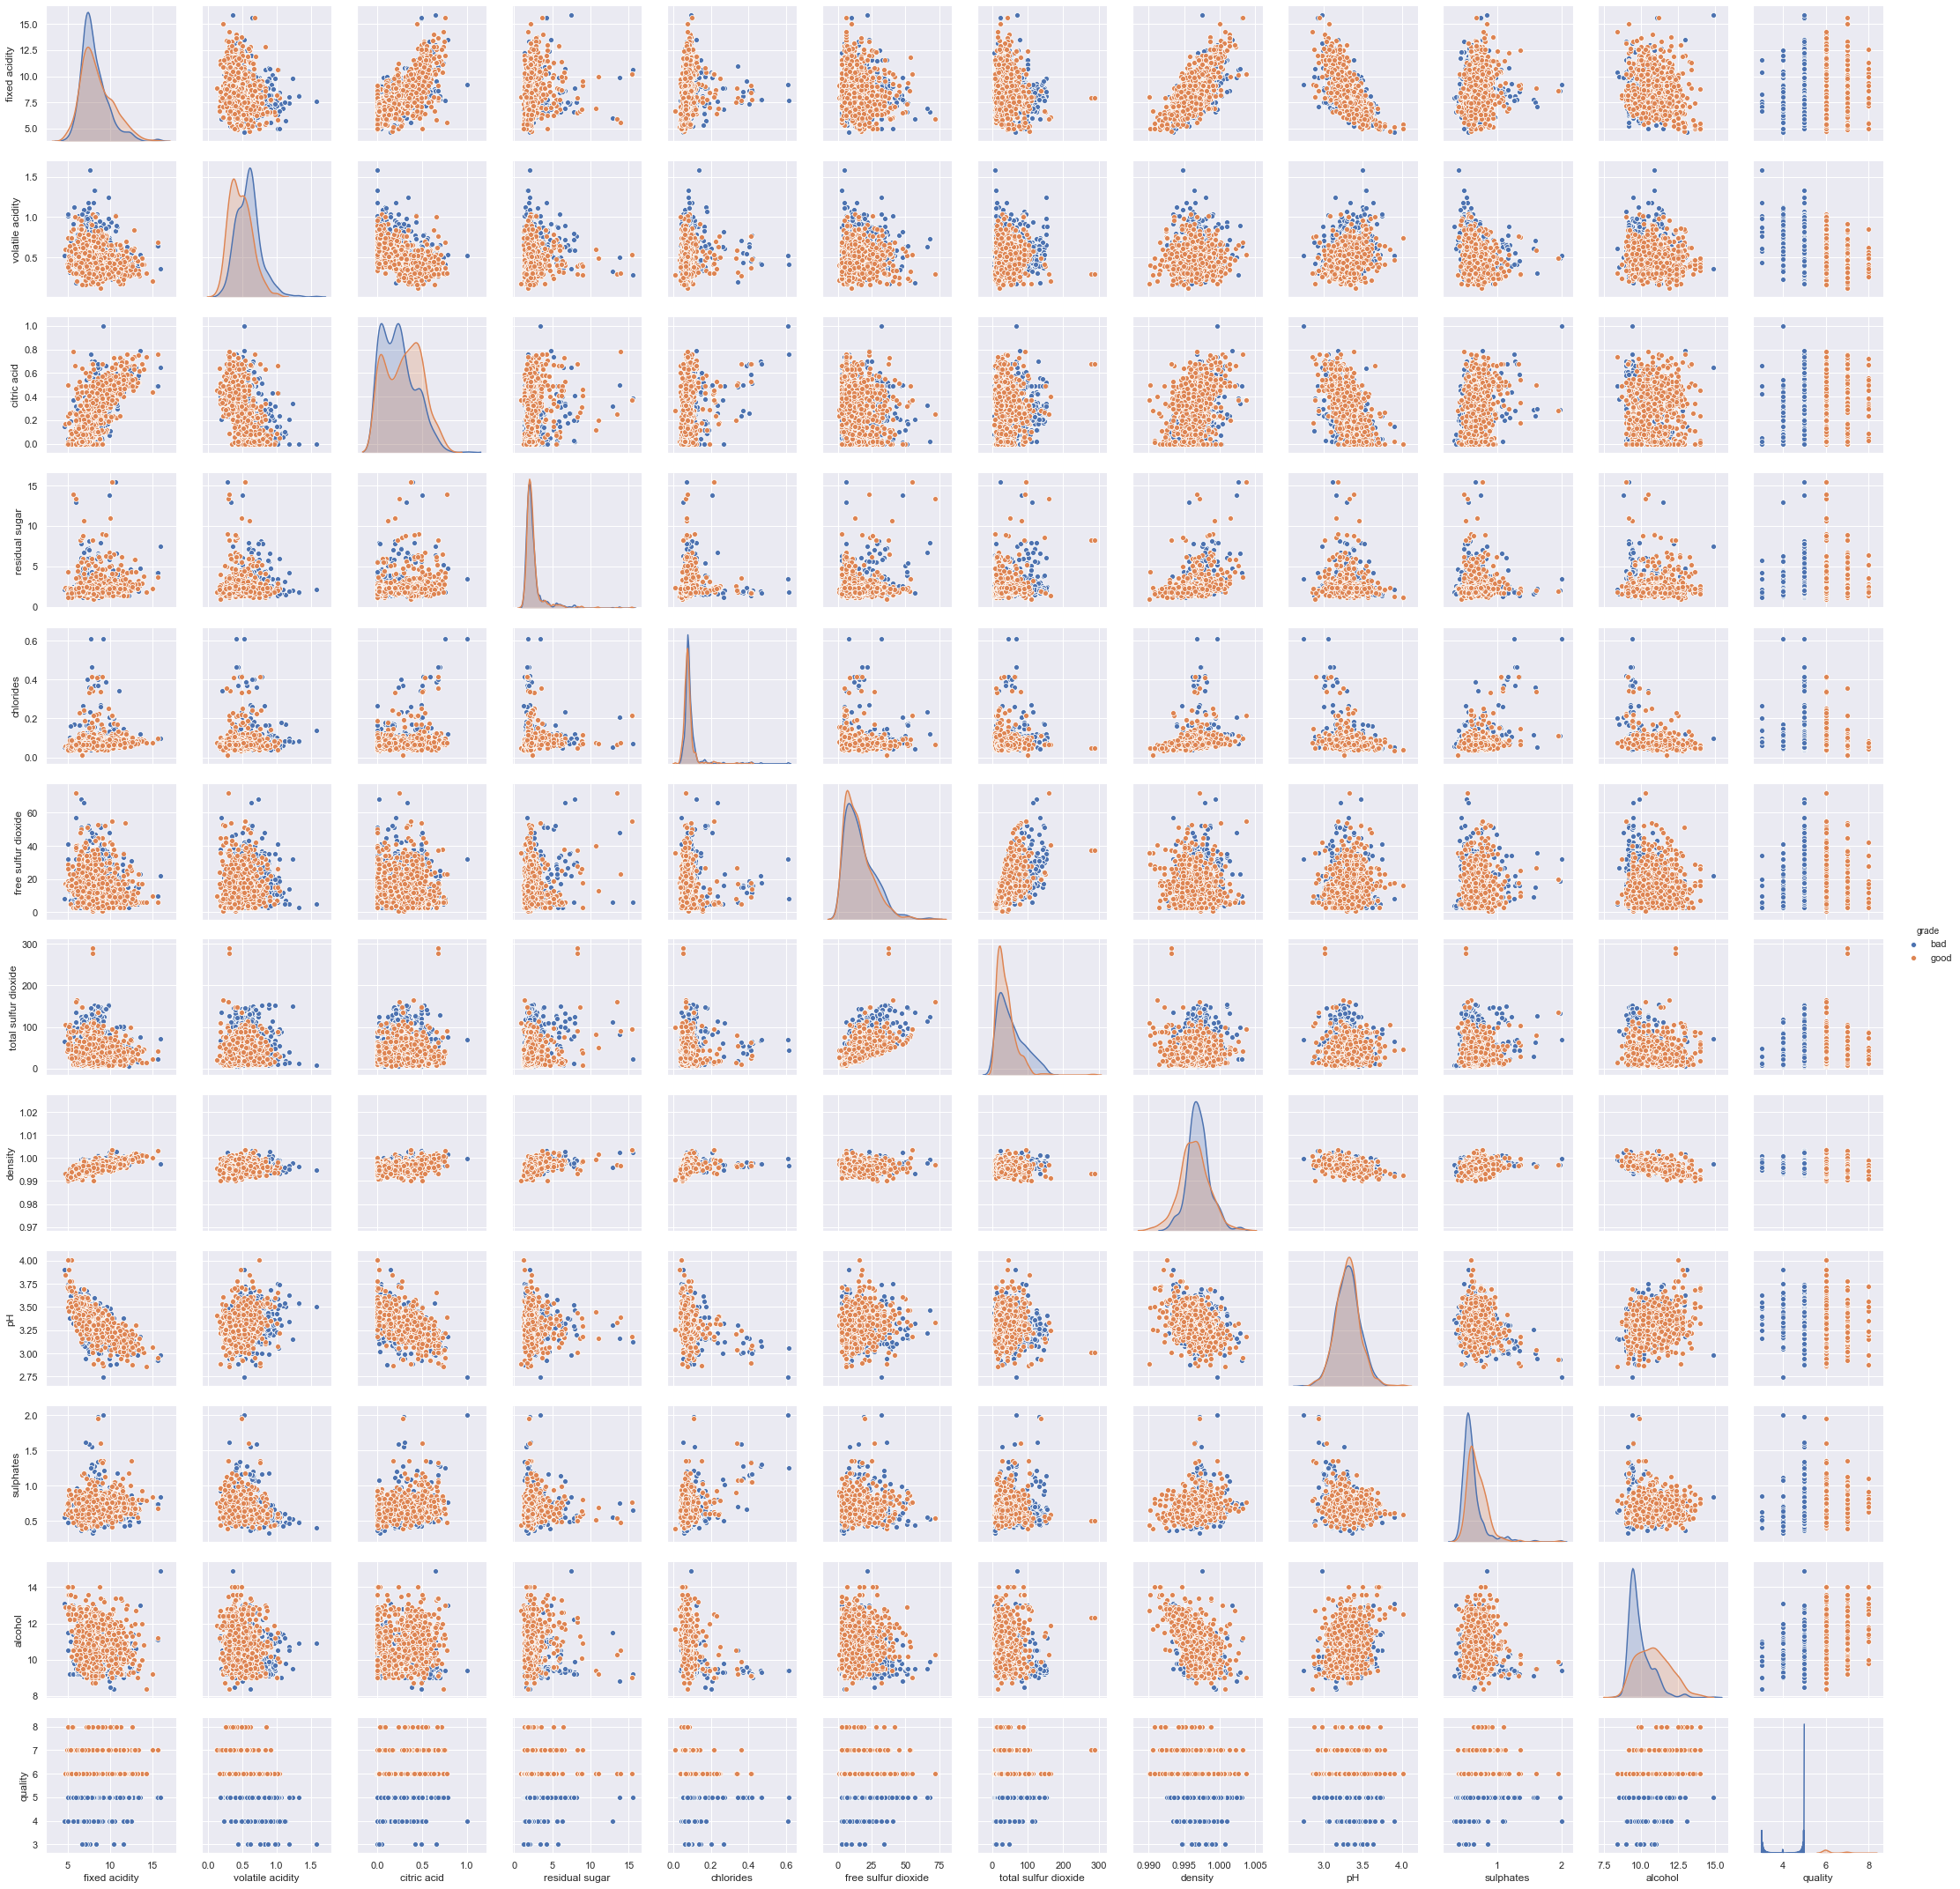

In [26]:
sns.pairplot(df.dropna(),hue='grade')

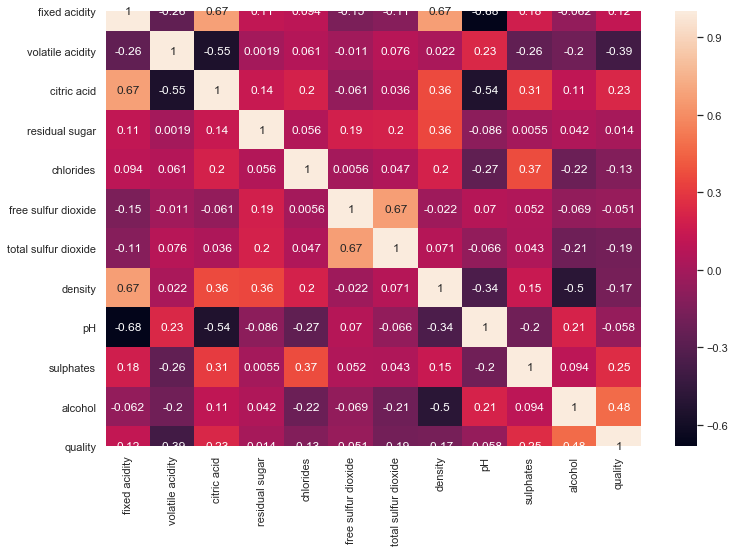

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [28]:
#Model Buiding

In [29]:
le=LabelEncoder()
df['grade']=le.fit_transform(df.grade)

In [30]:
y=df.grade
x=df.drop('grade',axis=1)
x.shape,y.shape

((1599, 12), (1599,))

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [32]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [33]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
prediction=logreg.predict(x_test)

In [34]:
print('intercept: ',logreg.intercept_)
print('Coefficients: ',logreg.coef_)

intercept:  [1.43607928]
Coefficients:  [[ 0.04103024 -0.22156106 -0.05058607  0.03696024 -0.10138686  0.08521369
  -0.26671167 -0.0209535   0.02586418  0.16934599  0.31680548  7.01775757]]


In [35]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [36]:
print('Accuracy Score: ',accuracy_score(y_test,prediction))

Accuracy Score:  1.0


In [37]:
cm=confusion_matrix(y_test,prediction)
cm

array([[178,   0],
       [  0, 142]], dtype=int64)

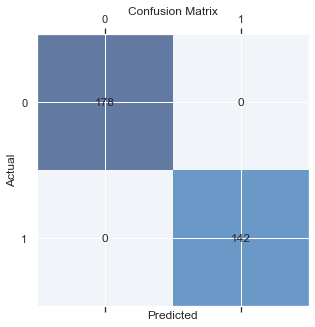

In [38]:
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.6)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


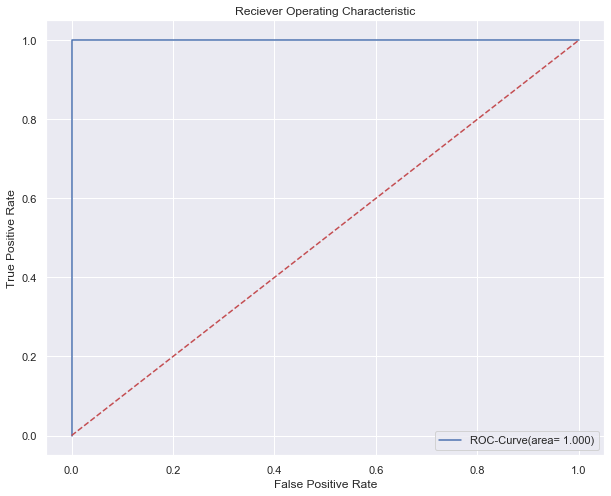

In [39]:
plt.figure(figsize=(10,8))
auc=roc_auc_score(y_test,prediction)
fpr,tpr,thr=roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='ROC-Curve(area= %0.3f)'% auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Reciever Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()